<a href="https://colab.research.google.com/github/nazalnihad/parallel_computing/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [9]:

# dataset
path = kagglehub.dataset_download("aungpyaeap/supermarket-sales")
print("Path to dataset files:", path)

# Load
data_path = os.path.join(path, "supermarket_sales - Sheet1.csv")
df = pd.read_csv(data_path)

100%|██████████| 35.9k/35.9k [00:00<00:00, 42.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/aungpyaeap/supermarket-sales/versions/3


In [11]:
# Preprocess
df.dropna(inplace=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=[np.number]))

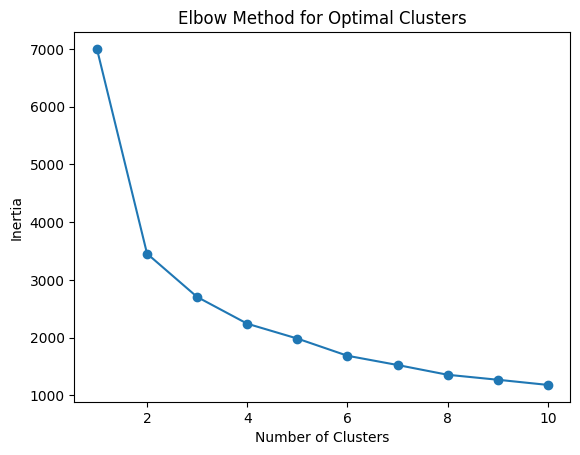

In [12]:
# Determine optimal clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [13]:
# K-Means Clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [14]:

# Analyze clusters
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(df.groupby('Cluster')[numeric_columns].mean())

         Unit price  Quantity     Tax 5%       Total        cogs  \
Cluster                                                            
0         61.537560  6.508929  18.319183  384.702844  366.383661   
1         83.580847  8.649718  35.775537  751.286271  715.510734   
2         41.481930  3.679671   5.938098  124.700048  118.761951   

         gross margin percentage  gross income    Rating  Cluster  
Cluster                                                            
0                       4.761905     18.319183  7.028869      0.0  
1                       4.761905     35.775537  6.670621      1.0  
2                       4.761905      5.938098  7.043737      2.0  


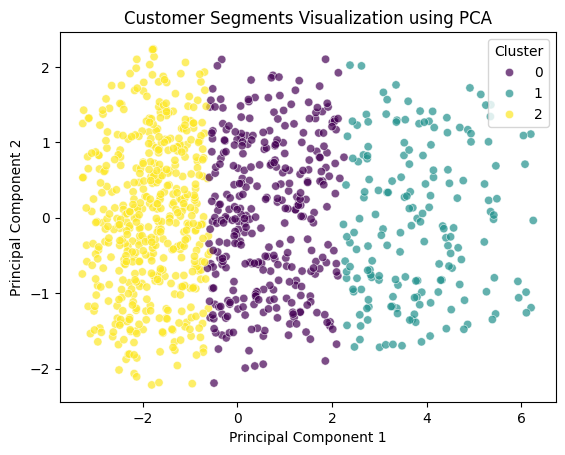

In [15]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.title("Customer Segments Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()